## References 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.parallel_coordinates.html

https://plot.ly/python/reference/#parcoords

In [29]:
from matplotlib import pyplot as plt
import pandas as pd

In [30]:
df = pd.read_csv('./world-happiness-report-2019.csv')
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [31]:
df.columns

Index(['Country (region)', 'Ladder', 'SD of Ladder', 'Positive affect',
       'Negative affect', 'Social support', 'Freedom', 'Corruption',
       'Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy'],
      dtype='object')

In [32]:
df_select = df[['Country (region)', 'Social support', 'Freedom', 'Corruption','Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy']]

In [34]:
def normalize_data(df, col):
    
    minval = df[col].min()
    maxval = df[col].max()
    meanval = df[col].mean()
    rangeval = maxval - minval 
    df[col] = (df[col] - meanval)/rangeval
    return df
    

In [35]:
df_select = normalize_data(df_select,'Social support')
df_select = normalize_data(df_select,'Freedom')
df_select = normalize_data(df_select,'Generosity')
df_select = normalize_data(df_select,'Corruption')
df_select = normalize_data(df_select,'Log of GDP\nper capita')
df_select = normalize_data(df_select,'Healthy life\nexpectancy')

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [36]:
df_select.head()

,Country (region),Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,-0.493506,-0.474026,-0.479592,-0.201299,-0.360927,-0.325503
1,Denmark,-0.480519,-0.467532,-0.486395,-0.363636,-0.413907,-0.352349
2,Norway,-0.487013,-0.487013,-0.452381,-0.435065,-0.460265,-0.426174
3,Iceland,-0.500000,-0.461039,-0.200680,-0.487013,-0.407285,-0.419463
4,Netherlands,-0.409091,-0.383117,-0.425170,-0.461039,-0.427152,-0.385906


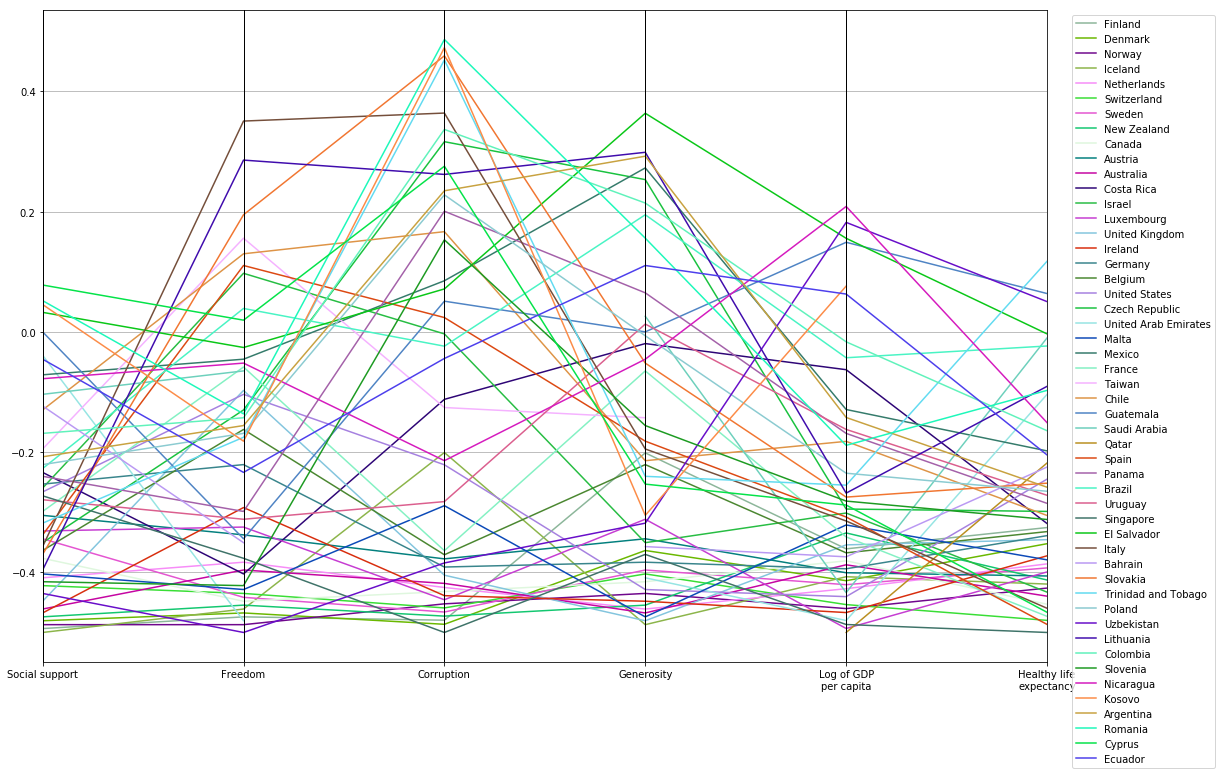

In [37]:

plt.figure(figsize=(18,12))
pd.plotting.parallel_coordinates(df_select.head(50), 'Country (region)')
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")
plt.show()